In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
!gdown 10raS10SpuNU9OHREA13En_UgUReIDV_Z


Downloading...
From: https://drive.google.com/uc?id=10raS10SpuNU9OHREA13En_UgUReIDV_Z
To: /content/round-3-island-data-bottle.zip
100% 1.73M/1.73M [00:00<00:00, 97.1MB/s]


In [ ]:
!gdown 1wutJjHPQCa89EMhEqnsD3B595AIFXlGa

Downloading...
From: https://drive.google.com/uc?id=1wutJjHPQCa89EMhEqnsD3B595AIFXlGa
To: /content/gifts.zip
100% 75.3k/75.3k [00:00<00:00, 49.2MB/s]


In [ ]:
!unzip /content/round-3-island-data-bottle.zip

Archive:  /content/round-3-island-data-bottle.zip
replace __MACOSX/._round-3-island-data-bottle? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/gifts.zip

Archive:  /content/gifts.zip
replace gifts/trades_round_3_day_2_wn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
snakes1 = pd.read_csv('gifts/trades_round_3_day_0_wn.csv', sep = ';')
snakes2 = pd.read_csv('gifts/trades_round_3_day_1_wn.csv', sep = ';')
snakes3 = pd.read_csv('gifts/trades_round_3_day_2_wn.csv', sep = ';')

In [ ]:
day1 = pd.read_csv('round-3-island-data-bottle/prices_round_3_day_0.csv', sep = ';')
day2 = pd.read_csv('round-3-island-data-bottle/prices_round_3_day_1.csv', sep = ';')
day3 = pd.read_csv('round-3-island-data-bottle/prices_round_3_day_2.csv', sep = ';')


In [ ]:
day1 = day1.rename(columns={'product': 'symbol'})
day2 = day2.rename(columns={'product': 'symbol'})
day3 = day3.rename(columns={'product': 'symbol'})

In [ ]:
trades1 = snakes1.merge(day1, on = ['timestamp', 'symbol'])
trades2 = snakes2.merge(day2, on = ['timestamp', 'symbol'])
trades3 = snakes3.merge(day3, on = ['timestamp', 'symbol'])

In [ ]:
snakes2['timestamp'] = snakes2['timestamp'] + 1000000
snakes3['timestamp'] = snakes3['timestamp'] + 2000000

In [ ]:
prices_df = pd.concat([day1, day2, day3]).reset_index()

In [ ]:
prices_df['timestamp'] = prices_df['timestamp'] + prices_df['day'] * 1000000

In [ ]:
trades_df = pd.concat([snakes1, snakes2, snakes3]).reset_index()

In [ ]:
trades_df['seller'].unique()

array(['Vinnie', 'Rhianna', 'Remy', 'Vladimir', 'Ruby'], dtype=object)

In [ ]:
products = ['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']
traders = ['Vinnie', 'Rhianna', 'Remy', 'Vladimir', 'Ruby']

In [ ]:
# Step 1: Create a pivot table of prices
pivot_prices = prices_df.pivot_table(index='timestamp', columns='symbol', values='mid_price', aggfunc='first')

# Step 2: Calculate the new mid_price for 'GIFT_BASKET' using values from the pivot table
# Filter out rows in prices_df that are for 'GIFT_BASKET'
gift_baskets = prices_df[prices_df['symbol'] == 'GIFT_BASKET']

# Update the mid_price for 'GIFT_BASKET' directly in prices_df
for idx, row in gift_baskets.iterrows():
    new_price = pivot_prices.at[row['timestamp'], 'GIFT_BASKET'] - \
                (6 * pivot_prices.at[row['timestamp'], 'STRAWBERRIES'] + \
                 4 * pivot_prices.at[row['timestamp'], 'CHOCOLATE'] + \
                 pivot_prices.at[row['timestamp'], 'ROSES'])
    prices_df.at[idx, 'mid_price'] = new_price


In [ ]:
prices_df

,index,day,timestamp,symbol,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,355.0,0.0
4,4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,346.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,39995,2,2999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,222.5,0.0
119996,39996,2,2999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,39997,2,2999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,237.5,0.0
119998,39998,2,2999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [ ]:
# Filter prices_df for 'GIFT_BASKET' and select only relevant columns
price_mapping = prices_df[prices_df['symbol'] == 'GIFT_BASKET'][['timestamp', 'mid_price']]
# Merge trades_df with price_mapping
trades_df = trades_df.merge(price_mapping, on='timestamp', how='left', suffixes=('', '_gift'))
# Subtract the mid_price of 'GIFT_BASKET' from the 'price' column
trades_df.loc[trades_df['symbol'] == 'GIFT_BASKET', 'price'] = trades_df[trades_df['symbol'] == 'GIFT_BASKET']['mid_price']

# Optionally, clean up by dropping the extra column if no longer needed
trades_df.drop(columns='mid_price', inplace=True)


In [ ]:
trades_df

,index,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,0,Remy,Vinnie,ROSES,SEASHELLS,15001.0,3
1,1,0,Remy,Vinnie,CHOCOLATE,SEASHELLS,8001.0,8
2,2,200,Vinnie,Rhianna,ROSES,SEASHELLS,15000.0,3
3,3,500,Vinnie,Remy,STRAWBERRIES,SEASHELLS,3999.0,10
4,4,1000,Ruby,Vinnie,GIFT_BASKET,SEASHELLS,353.0,2
...,...,...,...,...,...,...,...,...
11367,3796,2997900,Ruby,Vladimir,GIFT_BASKET,SEASHELLS,205.0,5
11368,3797,2998400,Remy,Vinnie,STRAWBERRIES,SEASHELLS,3985.0,4
11369,3798,2998800,Vinnie,Remy,CHOCOLATE,SEASHELLS,7752.0,7
11370,3799,2998900,Vinnie,Remy,ROSES,SEASHELLS,14404.0,5


In [ ]:
def rolling_sum(x):
  l = []
  roll_sum = 0
  for i in range(len(x)):
    roll_sum += x[i]
    l.append(roll_sum)
  return np.array(l)

In [ ]:
def plotter(symbol, trader, trades_df, prices_df, color, xlim1, xlim2):
  trader_trades = trades_df[(trades_df['buyer'] == trader) | (trades_df['seller'] == trader)]
  trader_buys = trades_df[(trades_df['buyer'] == trader)]
  trader_sells = trades_df[(trades_df['seller'] == trader)]

  #final = prices_df[prices_df['symbol'] == symbol].merge(trader_trades[trader_trades['symbol'] == symbol][['timestamp','net_quantity']], on = ['timestamp'], how = 'outer')
  dfp = prices_df[prices_df['symbol'] == symbol]
  tpt = trader_trades[trader_trades['symbol'] == symbol]
  ts = trader_sells[trader_sells['symbol'] == symbol]
  tb = trader_buys[trader_buys['symbol'] == symbol]
  plt.figure(figsize = (15,10))
  plt.plot(dfp['timestamp'], dfp['mid_price'])
  if color == 'green':
    plt.scatter(tb['timestamp'], tb['price'], color = 'green')
  if color == 'red':
    plt.scatter(ts['timestamp'], ts['price'], color = 'red')
  if color =='both':
    plt.scatter(tb['timestamp'], tb['price'], color = 'green')
    plt.scatter(ts['timestamp'], ts['price'], color = 'red')
  plt.title(str(trader) + ' trading ' + str(symbol))
  # plt.axhline(375, color = 'red')
  # plt.axhline(375 + 57, color = 'purple')
  # plt.axhline(375 - 57, color = 'purple')
  plt.xlim(xlim1, xlim2)
  plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plotter(symbol, trader, trades_df, prices_df, color, xlim1, xlim2):
    trader_trades = trades_df[(trades_df['buyer'] == trader) | (trades_df['seller'] == trader)]
    trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]
    trader_buys = trades_df[(trades_df['buyer'] == trader)]
    trader_sells = trades_df[(trades_df['seller'] == trader)]

    dfp = prices_df[prices_df['symbol'] == symbol]
    tpt = trader_trades[trader_trades['symbol'] == symbol]
    ts = trader_sells[trader_sells['symbol'] == symbol]
    tb = trader_buys[trader_buys['symbol'] == symbol]

    fig, ax1 = plt.subplots(figsize=(15, 10))

    ax1.plot(dfp['timestamp'], dfp['mid_price'], label='Mid Price')
    if color == 'green':
        ax1.scatter(tb['timestamp'], tb['price'], color='green', label='Buy Trades')
    if color == 'red':
        ax1.scatter(ts['timestamp'], ts['price'], color='red', label='Sell Trades')
    if color == 'both':
        ax1.scatter(tb['timestamp'], tb['price'], color='green', label='Buy Trades')
        ax1.scatter(ts['timestamp'], ts['price'], color='red', label='Sell Trades')

    ax1.set_title(str(trader) + ' trading ' + str(symbol))
    ax1.set_xlim(xlim1, xlim2)
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Price')

    ax2 = ax1.twinx()
    rolling_sum = trader_trades['quantity'].rolling(window=20, min_periods=1).sum()
    ax2.plot(trader_trades['timestamp'], rolling_sum, color='blue', label='Rolling Sum of Quantity')
    ax2.set_ylabel('Quantity (Rolling Sum)')

    # Making sure the legend includes all labels
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()

# Example usage:
# plotter('AAPL', 'John Doe', trades_df, prices_df, 'both', '2024-01-01', '2024-02-01')


In [ ]:
import matplotlib.pyplot as plt

def plotter(symbol, trader, trades_df, prices_df, color, xlim1, xlim2):
    trades_df[(trades_df['buyer'] == trader) & (trades_df['seller'] == trader)]['quantity'] = 0
    trader_trades = trades_df[(trades_df['buyer'] == trader) | (trades_df['seller'] == trader)]
    trader_buys = trades_df[(trades_df['buyer'] == trader)]
    trader_sells = trades_df[(trades_df['seller'] == trader)]

    trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]
    dfp = prices_df[prices_df['symbol'] == symbol]
    tpt = trader_trades[trader_trades['symbol'] == symbol]
    ts = trader_sells[trader_sells['symbol'] == symbol]
    tb = trader_buys[trader_buys['symbol'] == symbol]

    fig, ax1 = plt.subplots(figsize=(15, 10))

    # Plot mid price and trades
    ax1.plot(dfp['timestamp'], dfp['mid_price'], label='Mid Price', color='black')
    if color == 'green':
        ax1.scatter(tb['timestamp'], tb['price'], color='green', label='Buy Trades')
    if color == 'red':
        ax1.scatter(ts['timestamp'], ts['price'], color='red', label='Sell Trades')
    if color == 'both':
        ax1.scatter(tb['timestamp'], tb['price'], color='green', label='Buy Trades')
        ax1.scatter(ts['timestamp'], ts['price'], color='red', label='Sell Trades')

    ax1.set_title(f"{trader} trading {symbol}")
    ax1.set_xlim(xlim1, xlim2)
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Price')

    # Plot rolling sum of quantity on secondary y-axis
    ax2 = ax1.twinx()
    rolling_sum = tpt['quantity'].cumsum()
    ax2.plot(tpt['timestamp'], rolling_sum, color='blue', label='Cumulative Sum of Quantity')
    ax2.set_ylabel('Quantity (Cumulative Sum)')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()


<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


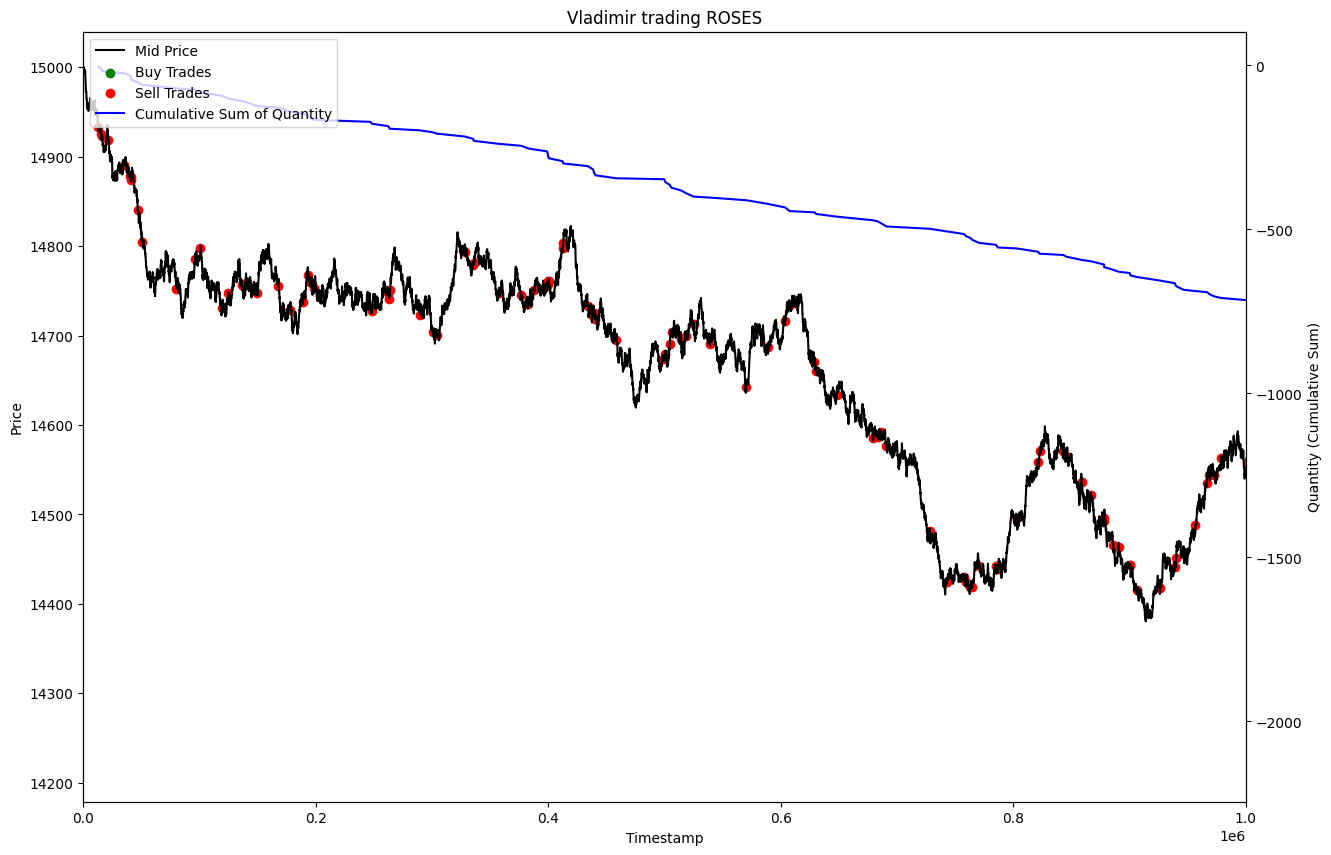

In [ ]:
plotter('ROSES', 'Vladimir', trades_df, prices_df, 'both', 0, 1000000)

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


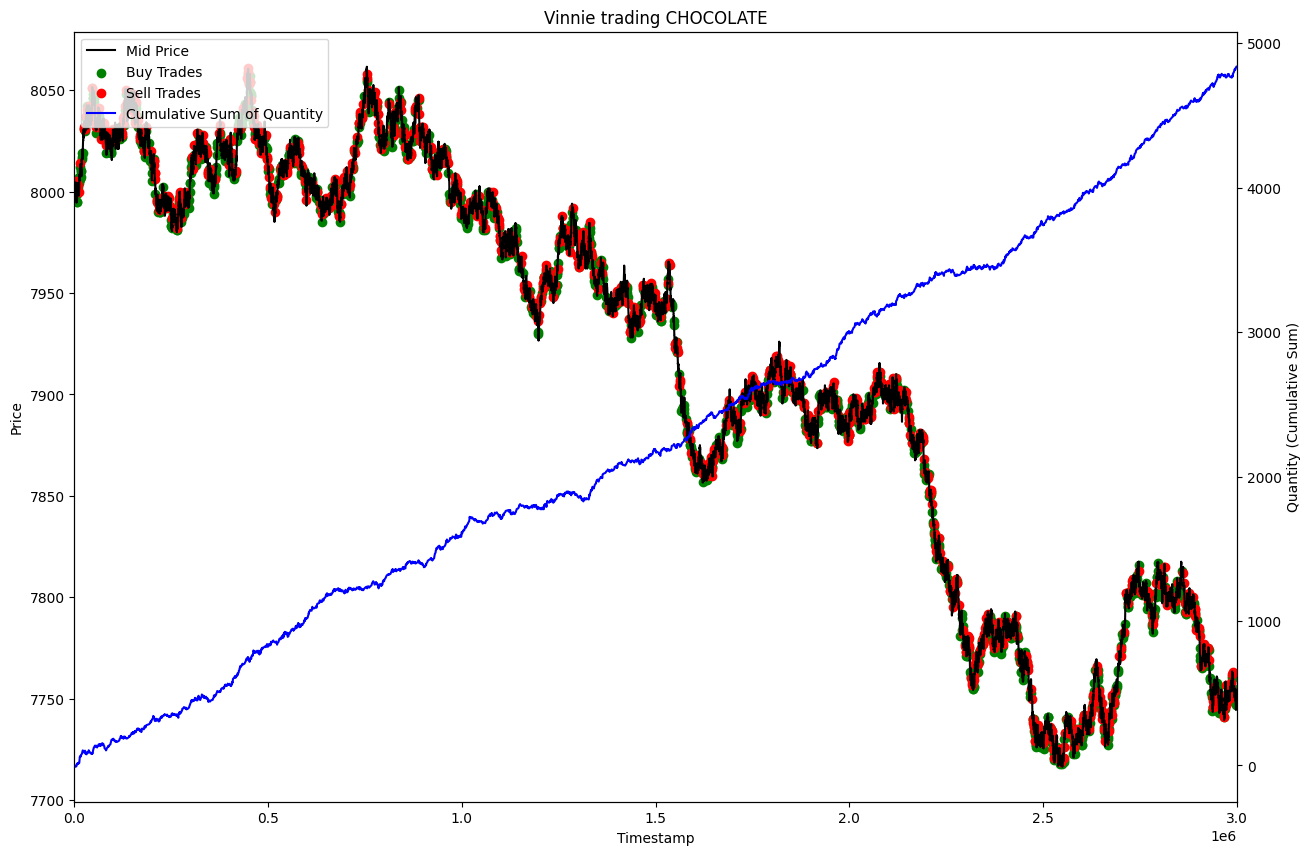

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


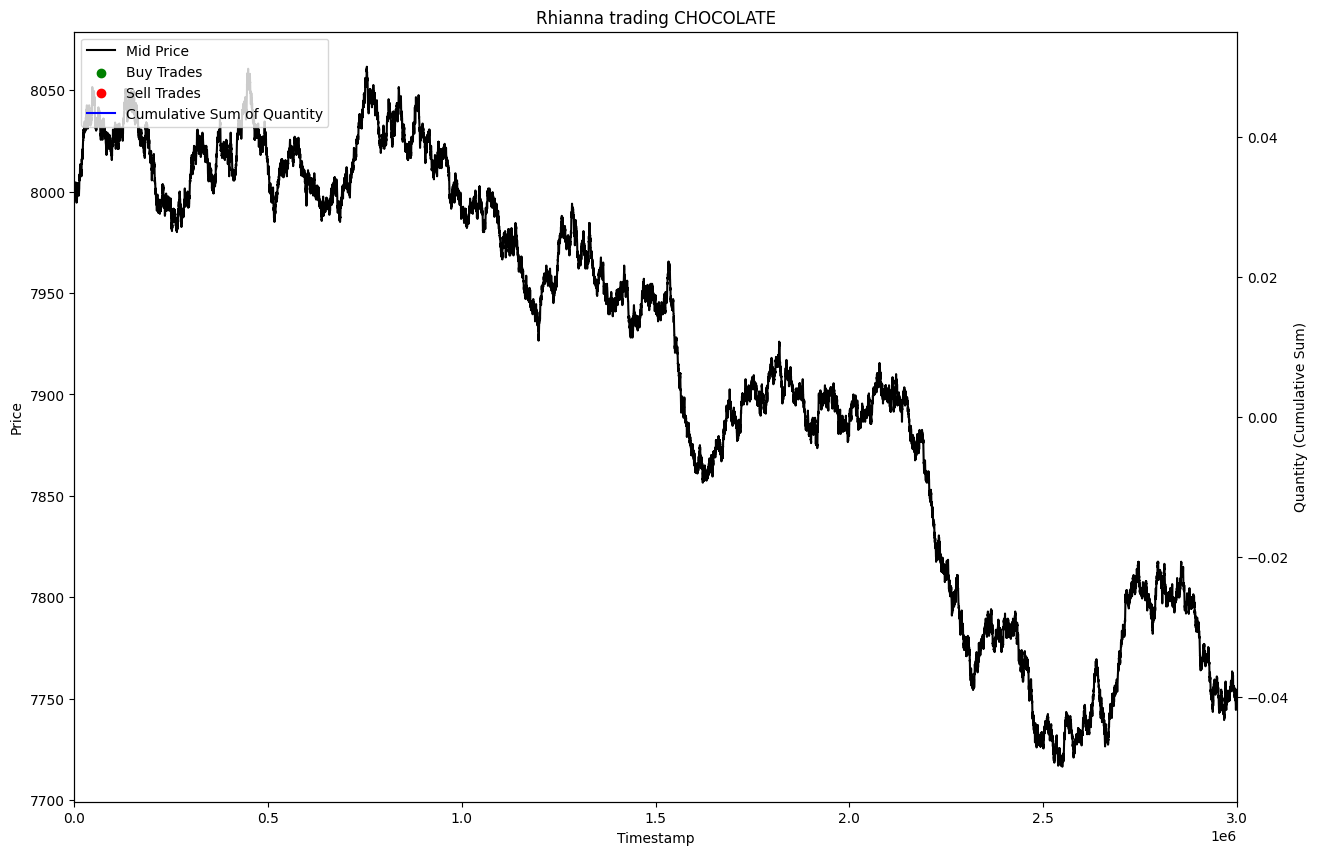

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


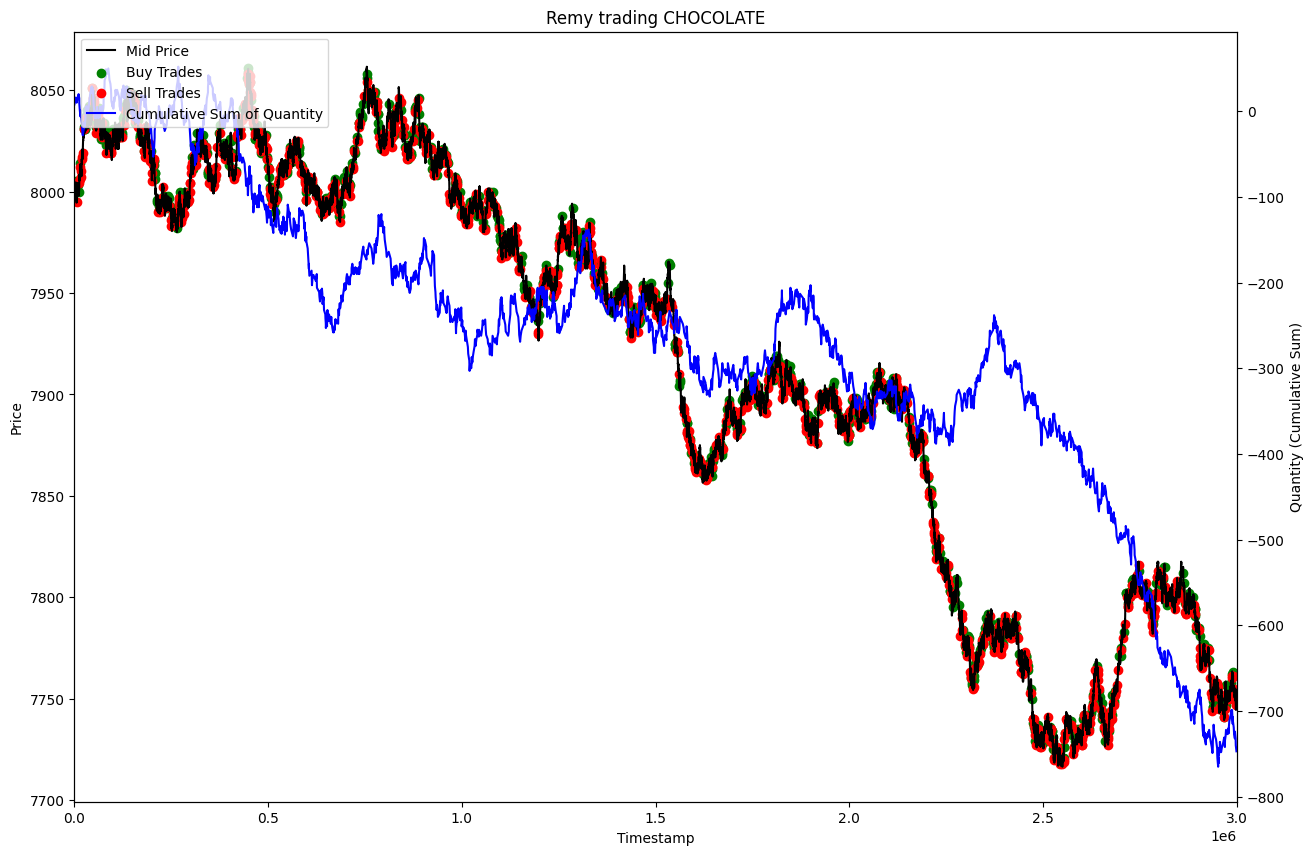

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


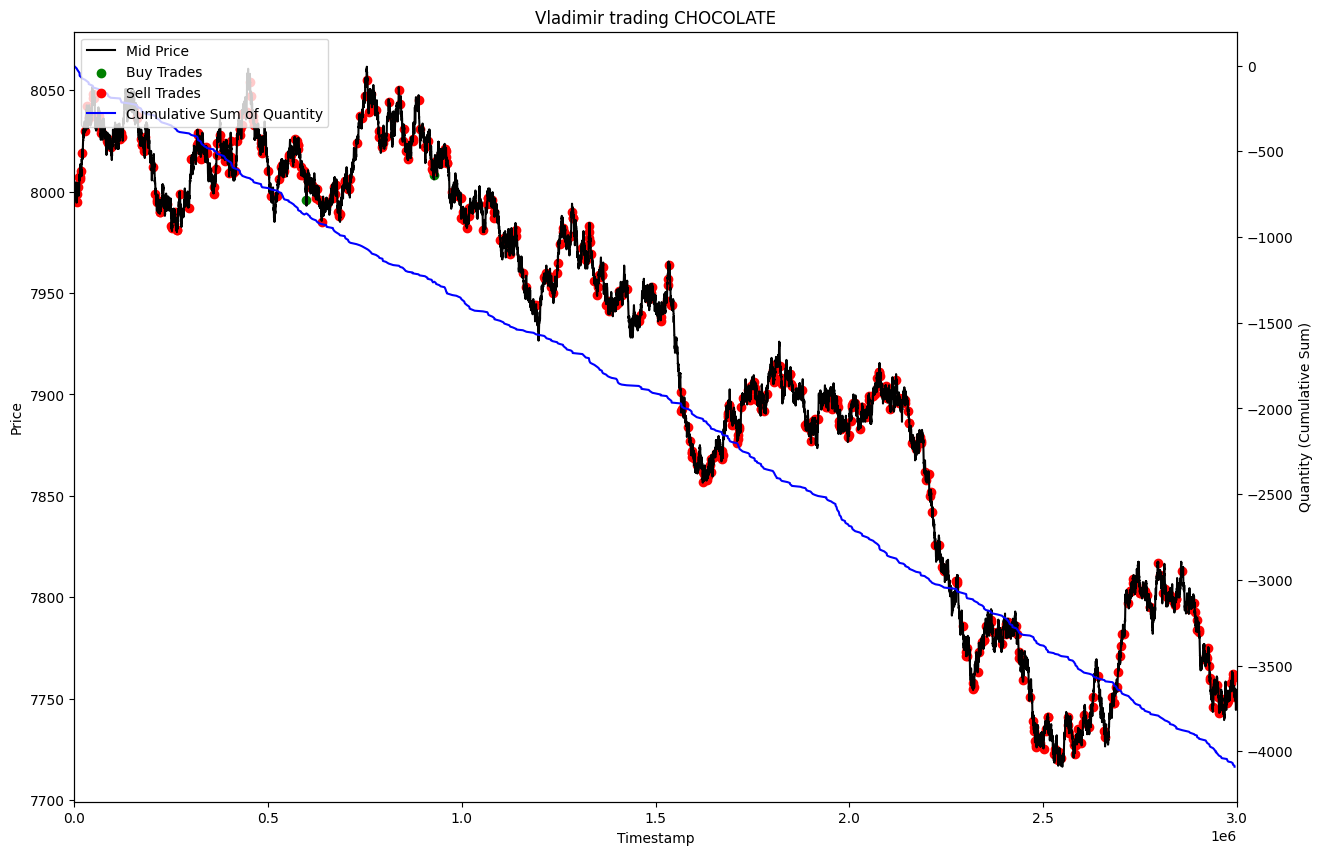

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


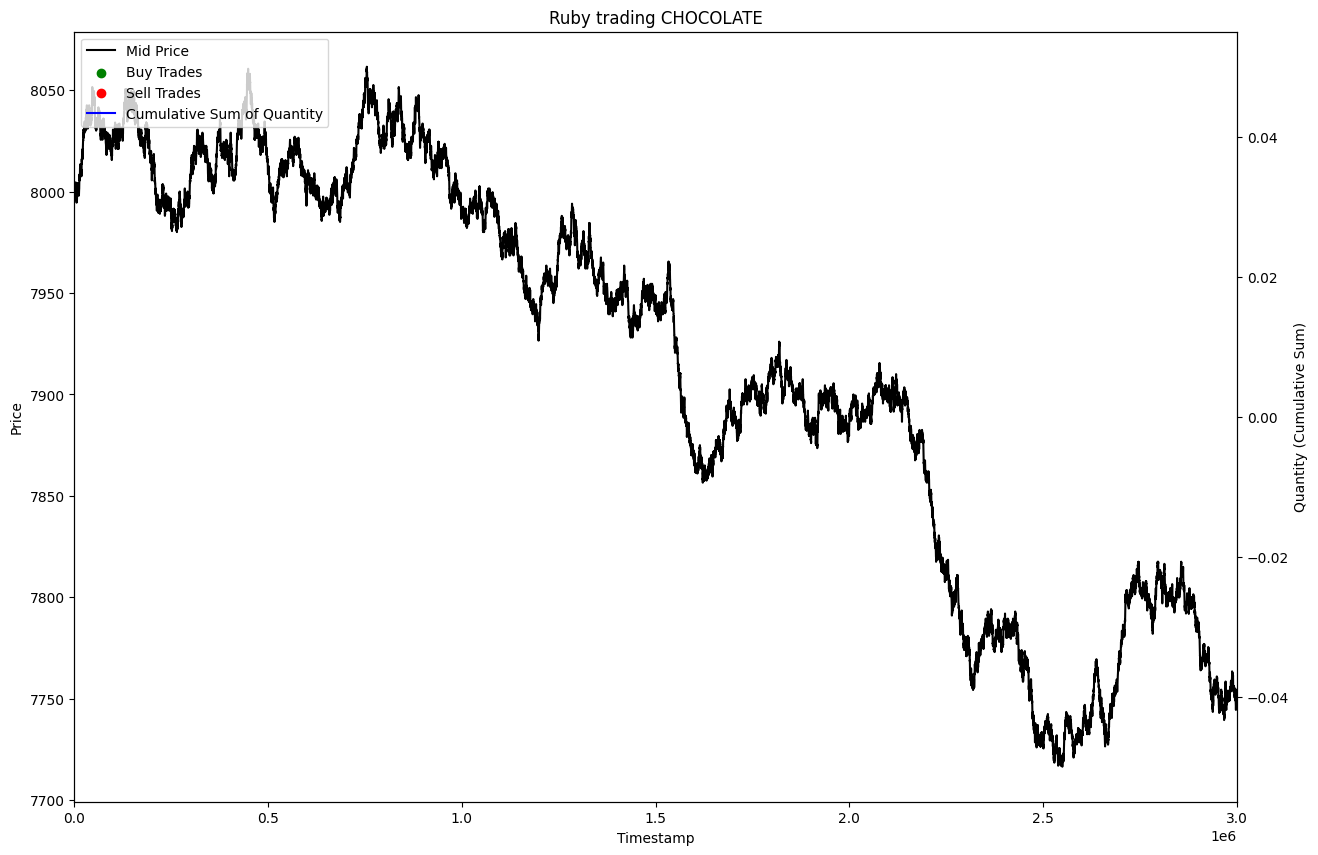

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


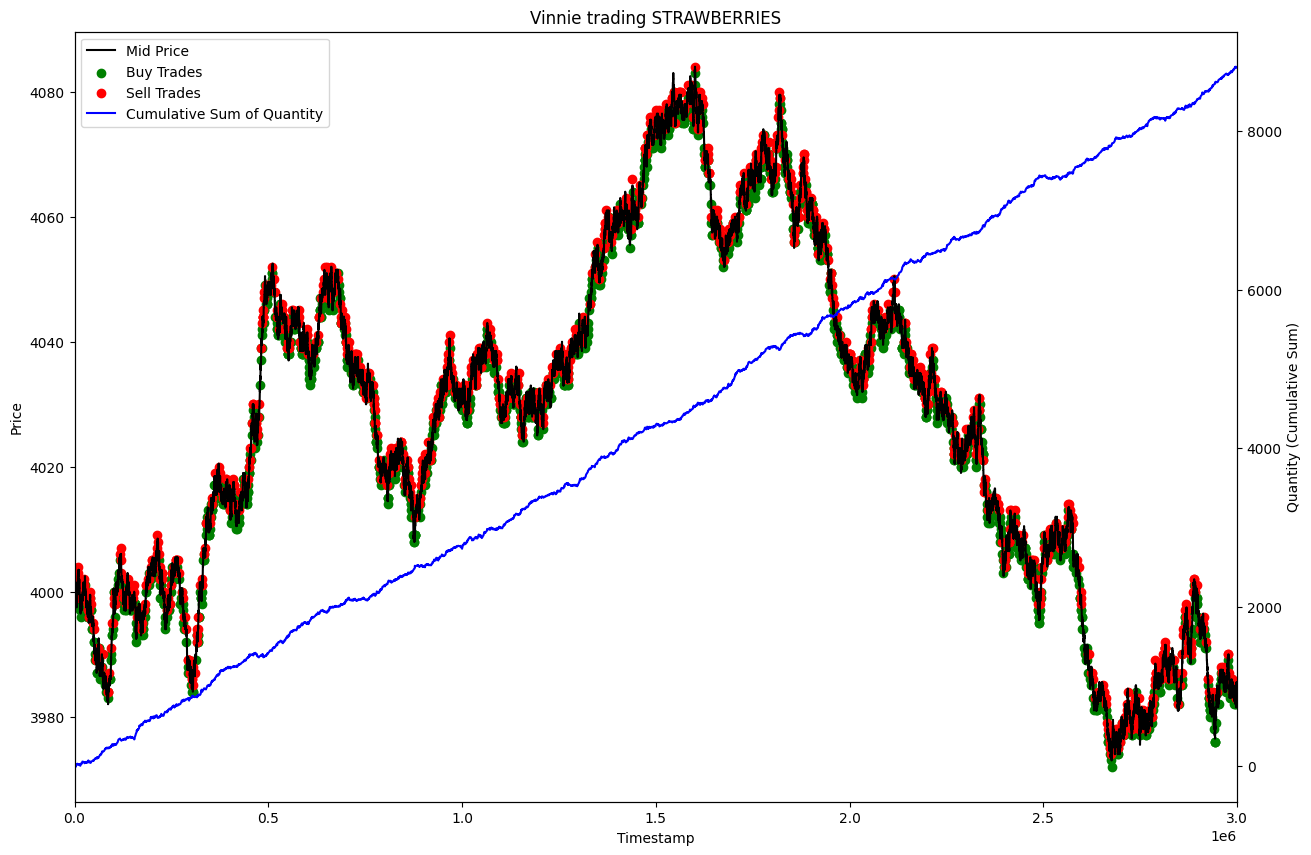

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


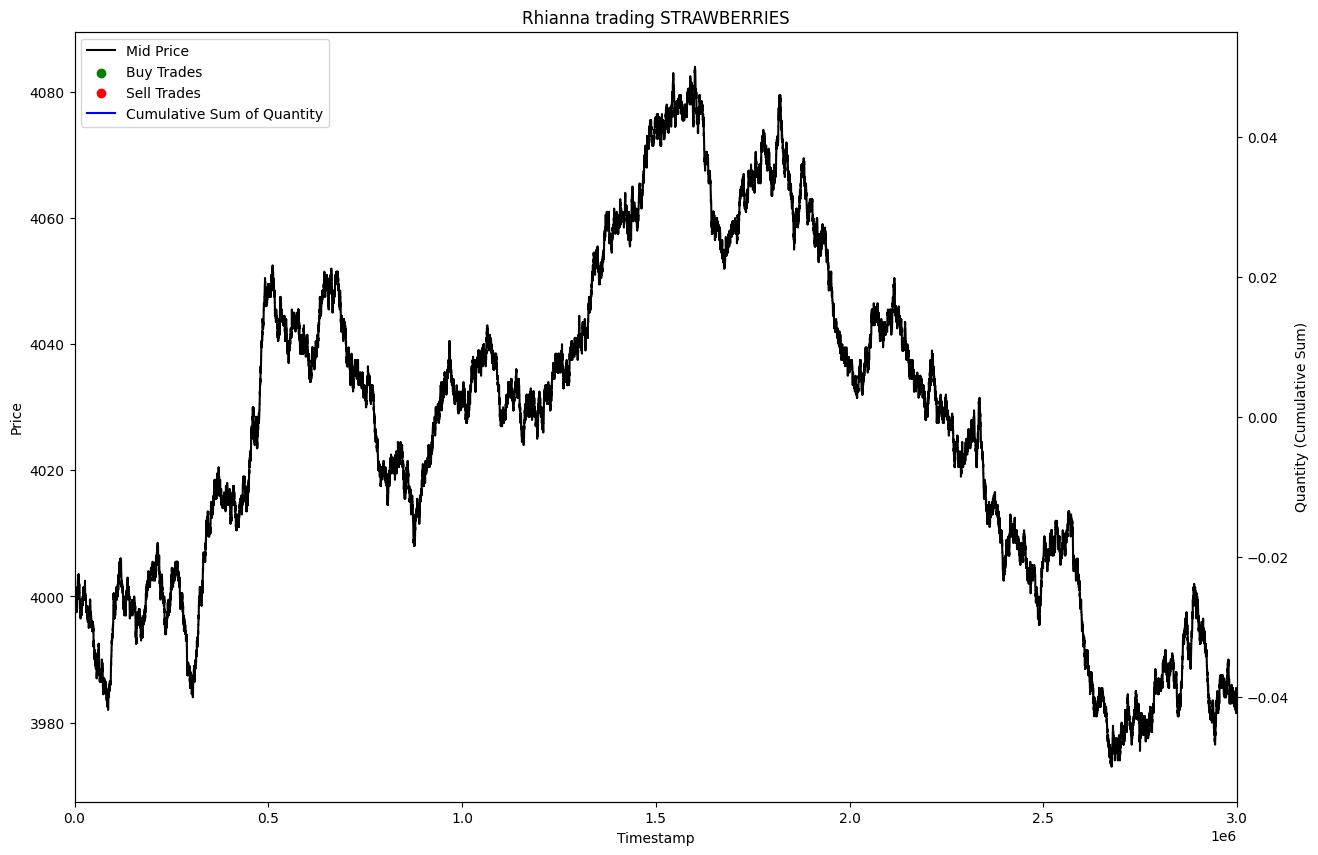

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


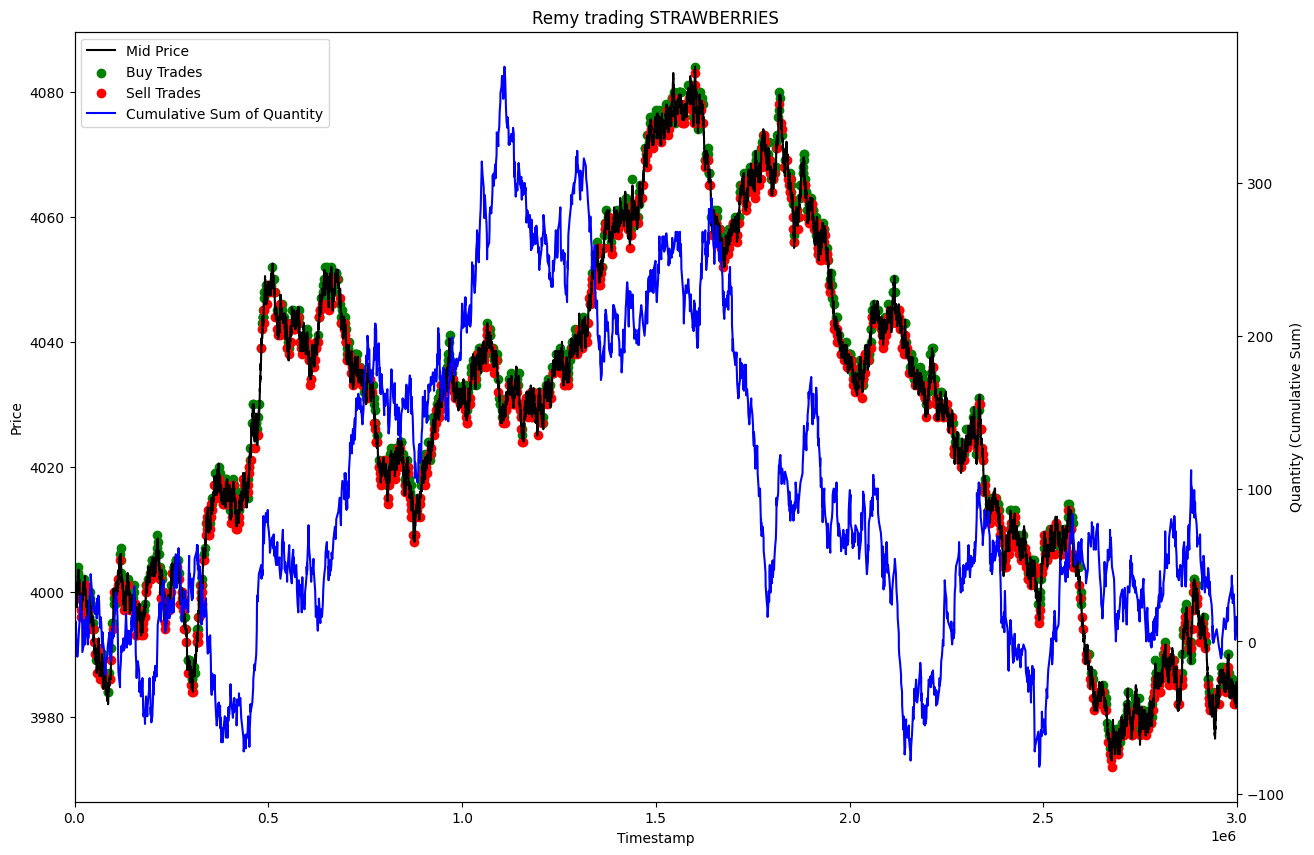

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


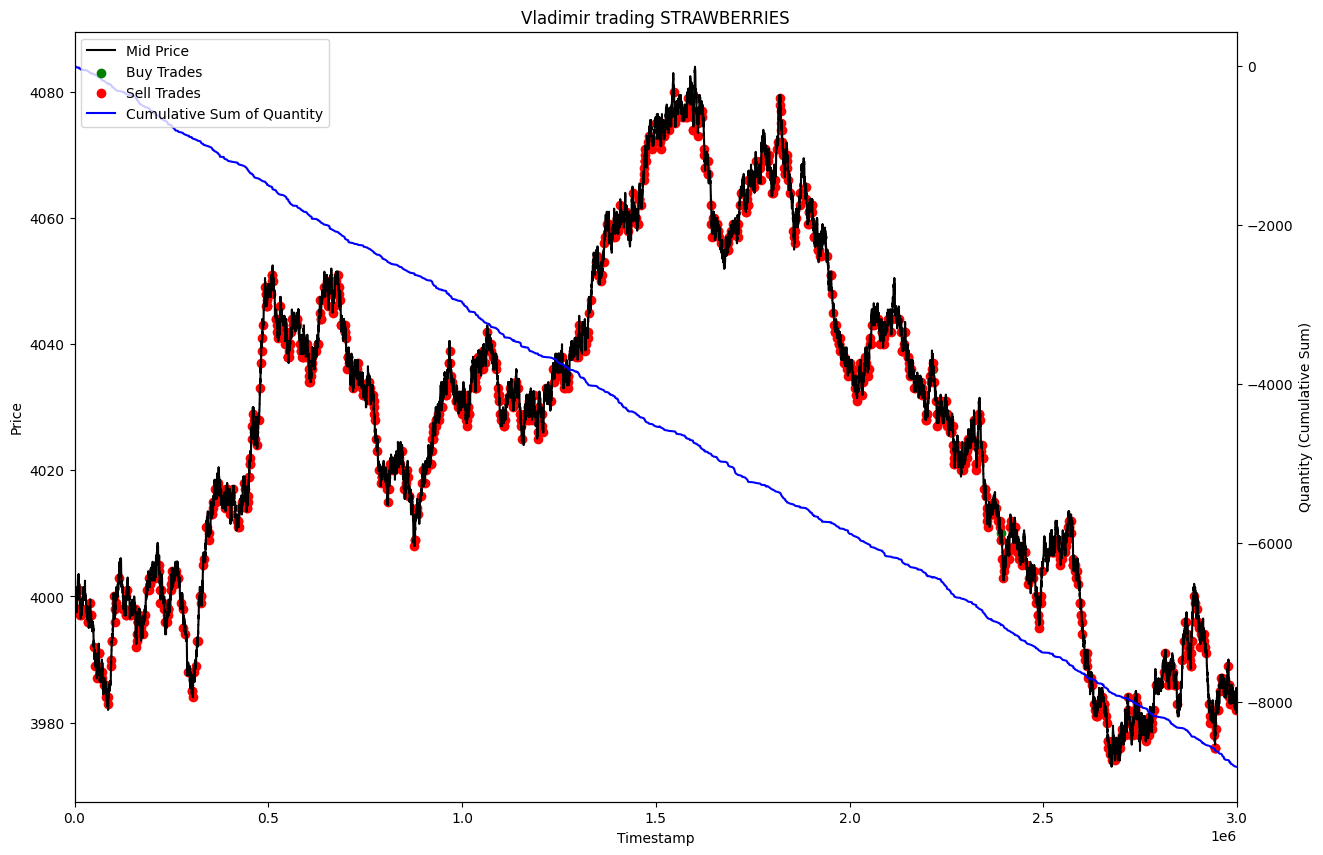

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


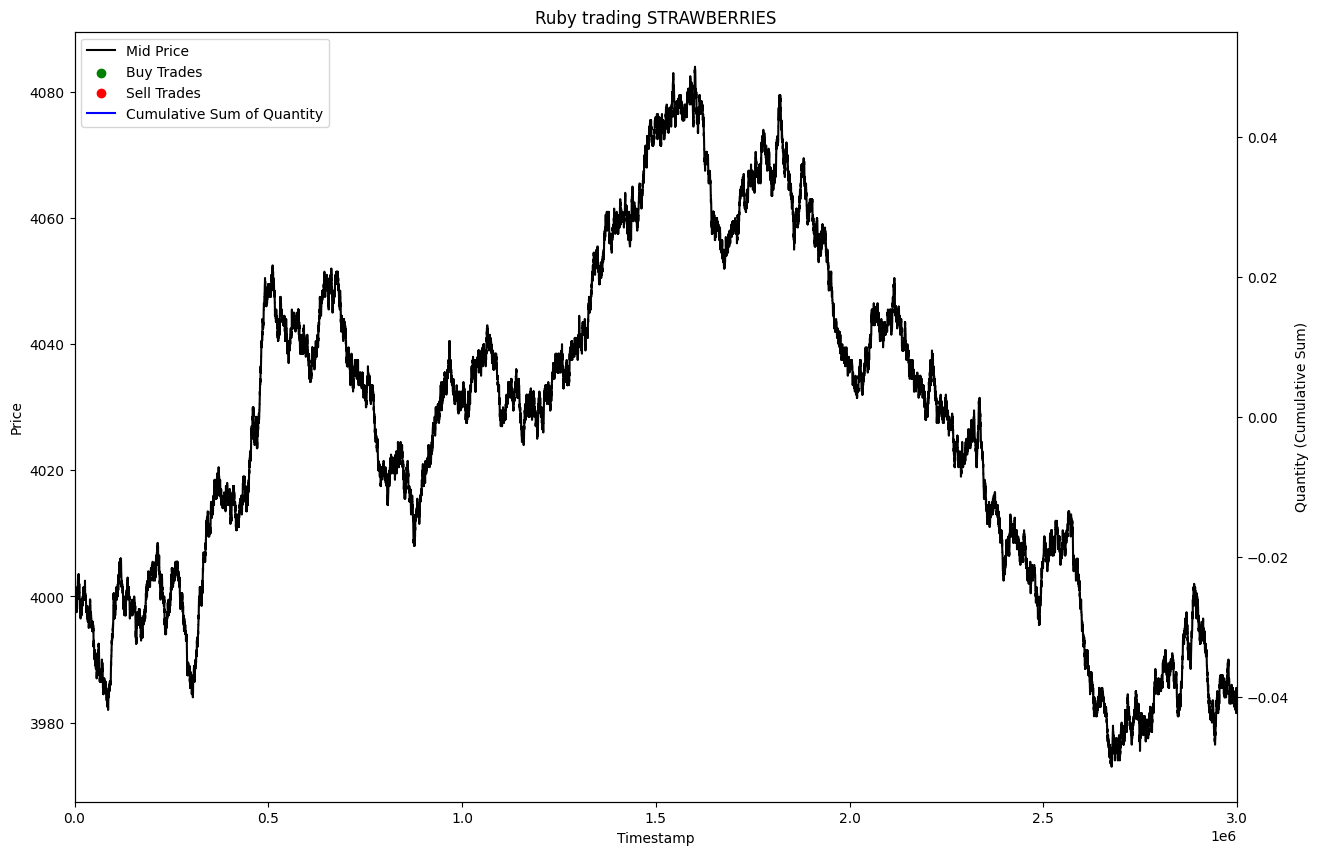

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


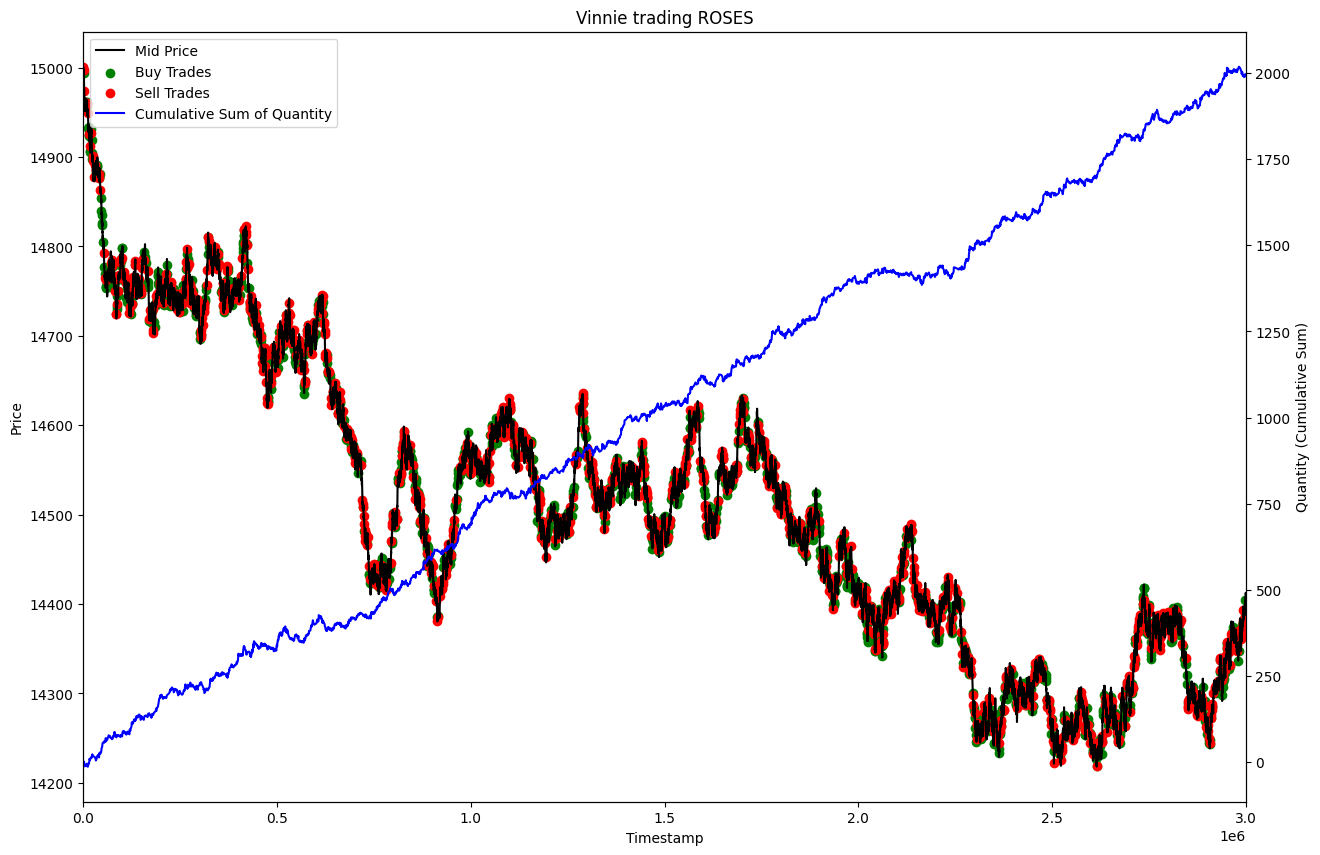

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


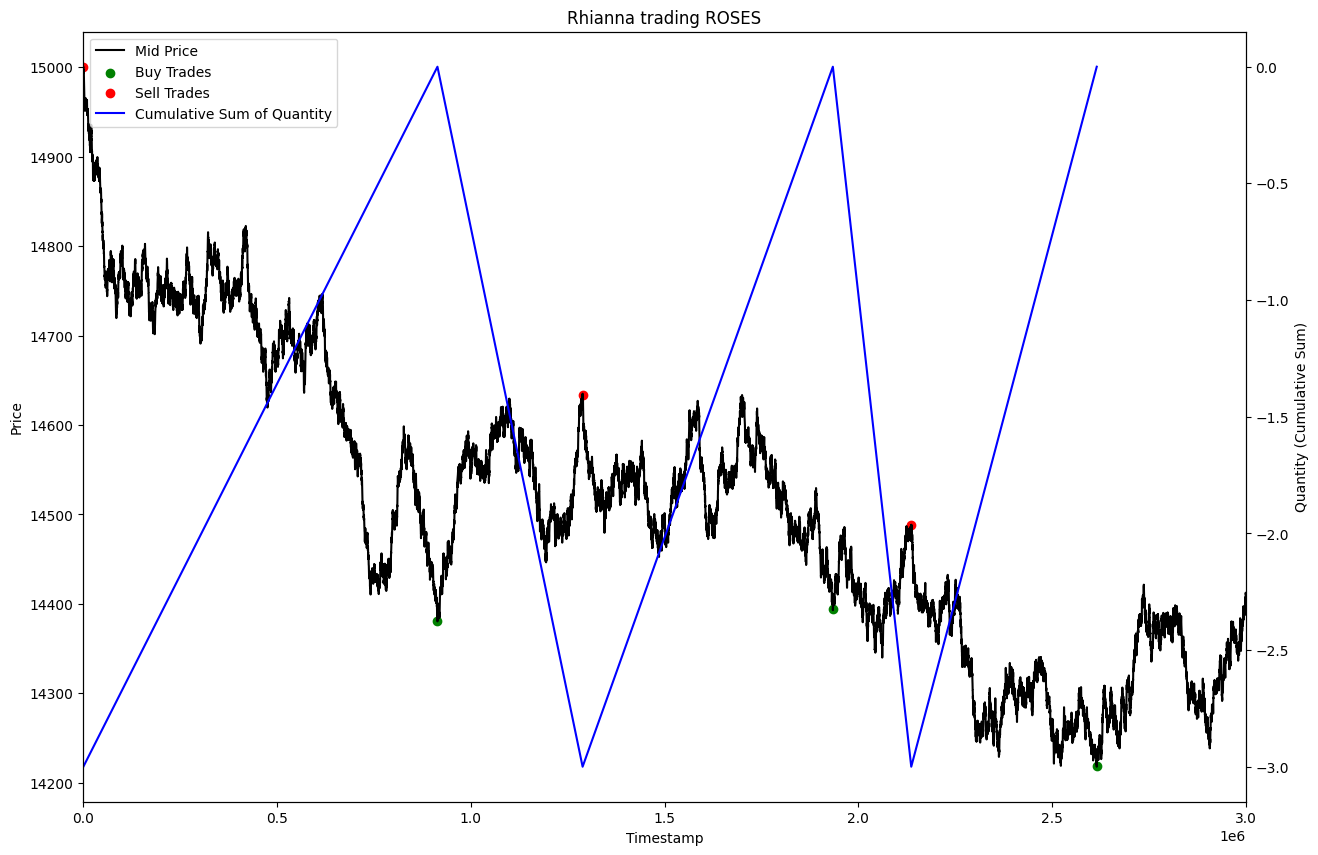

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


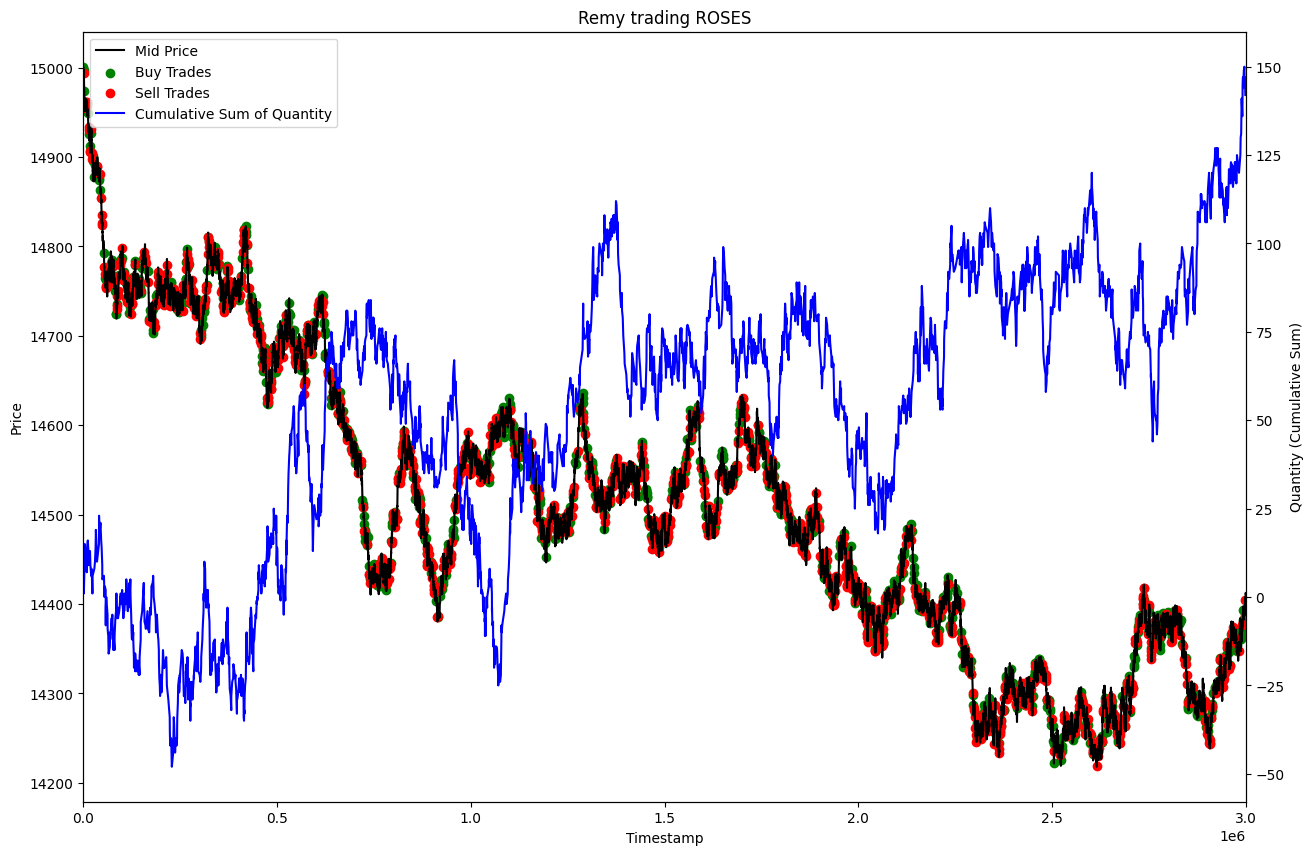

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


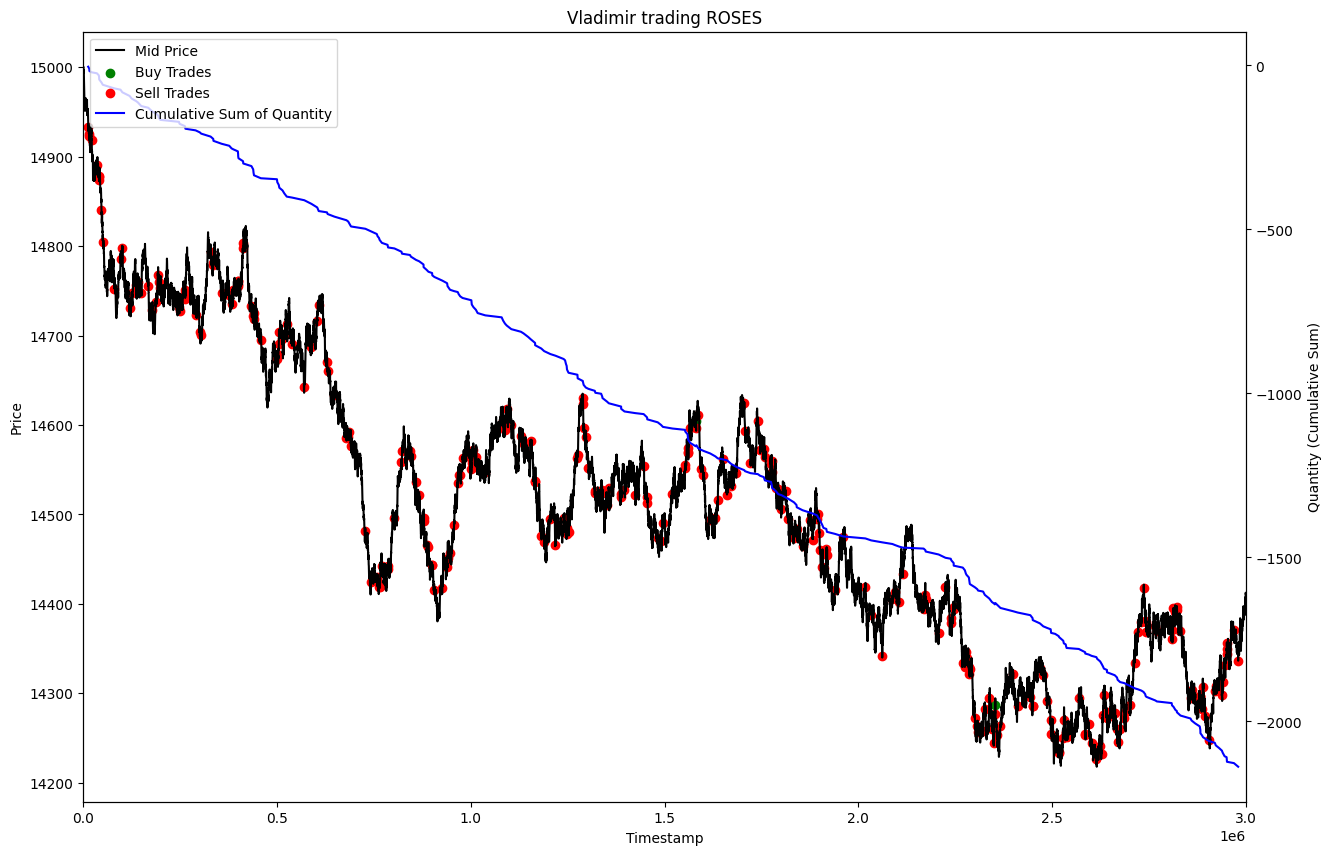

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


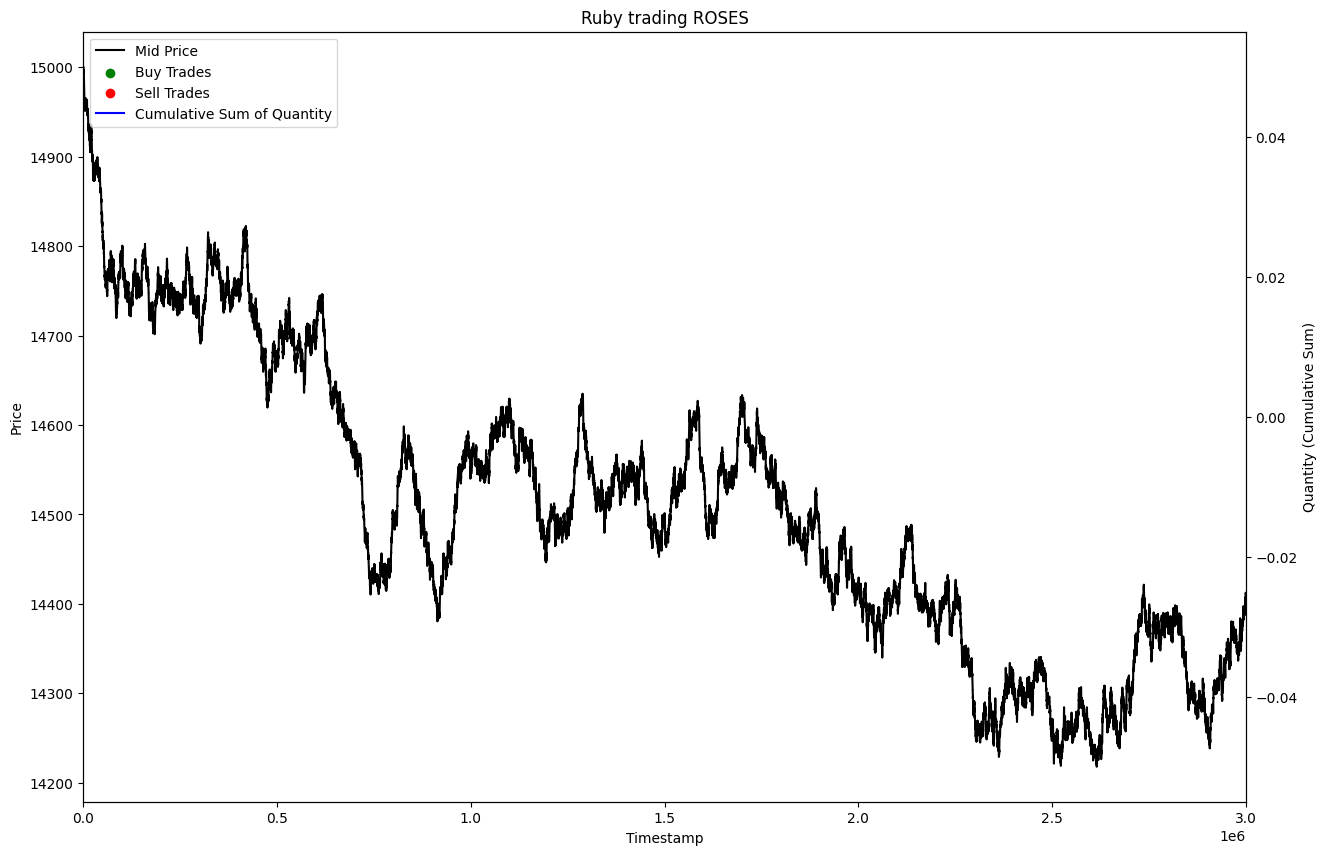

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


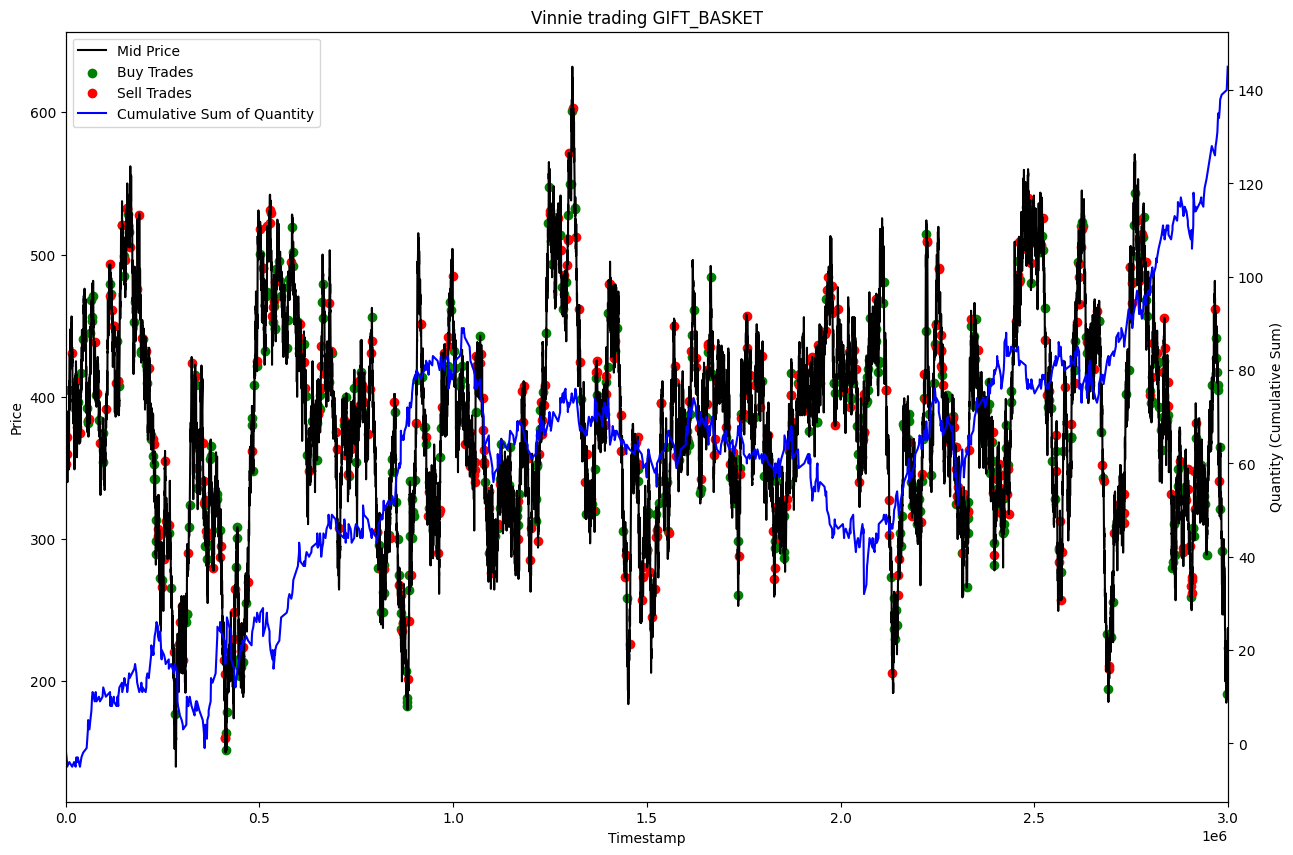

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


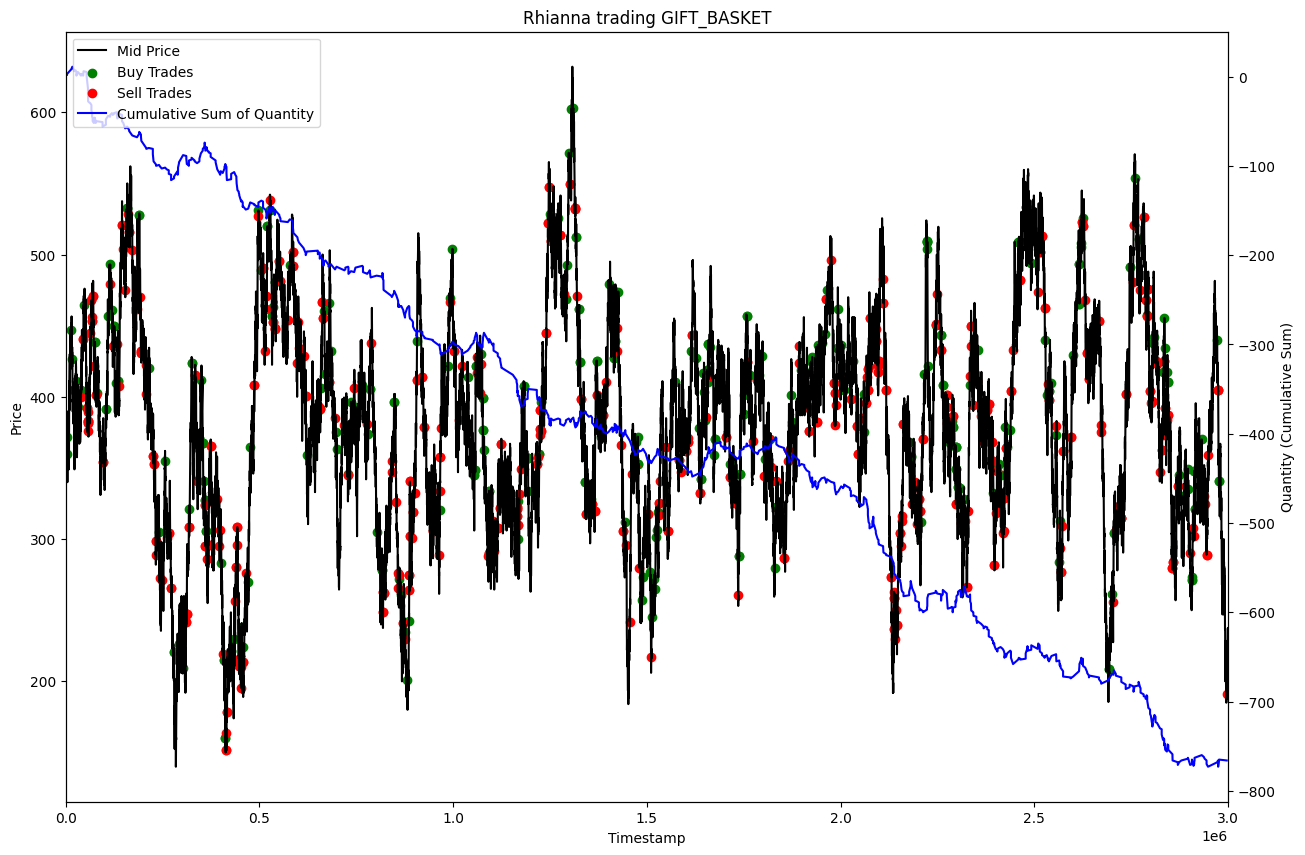

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


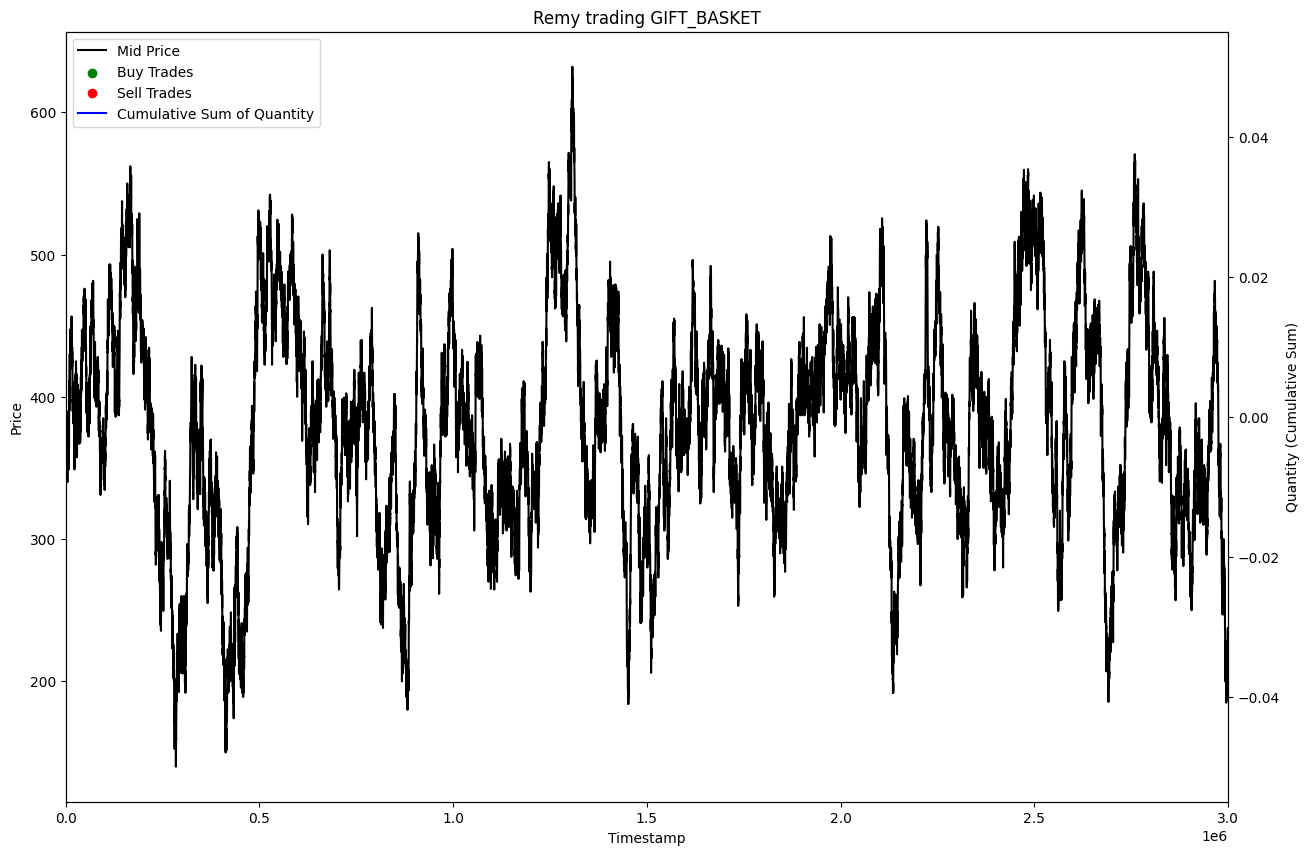

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


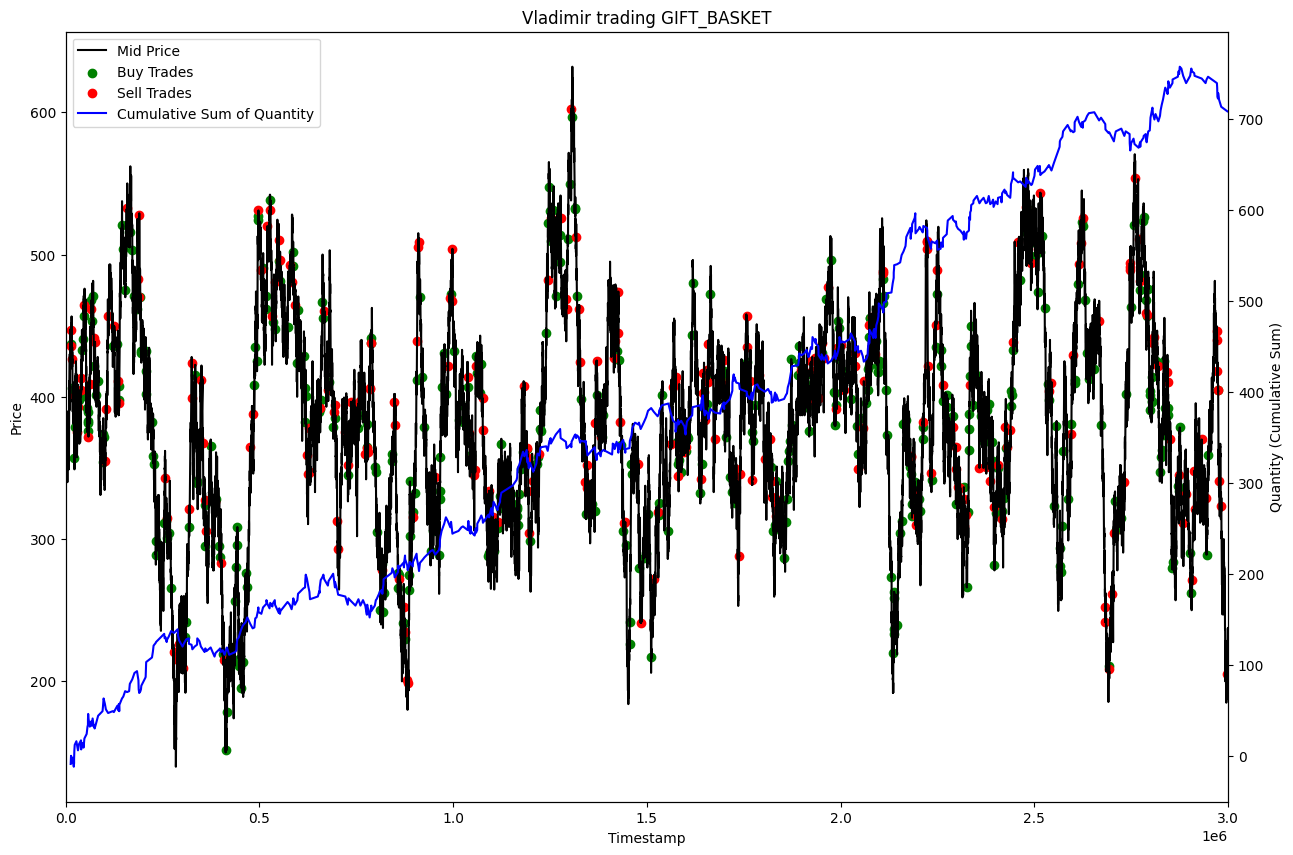

<ipython-input-65-91c844eadc00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_trades['quantity'][trader_trades['seller'] == trader] = -  trader_trades['quantity'][trader_trades['seller'] == trader]


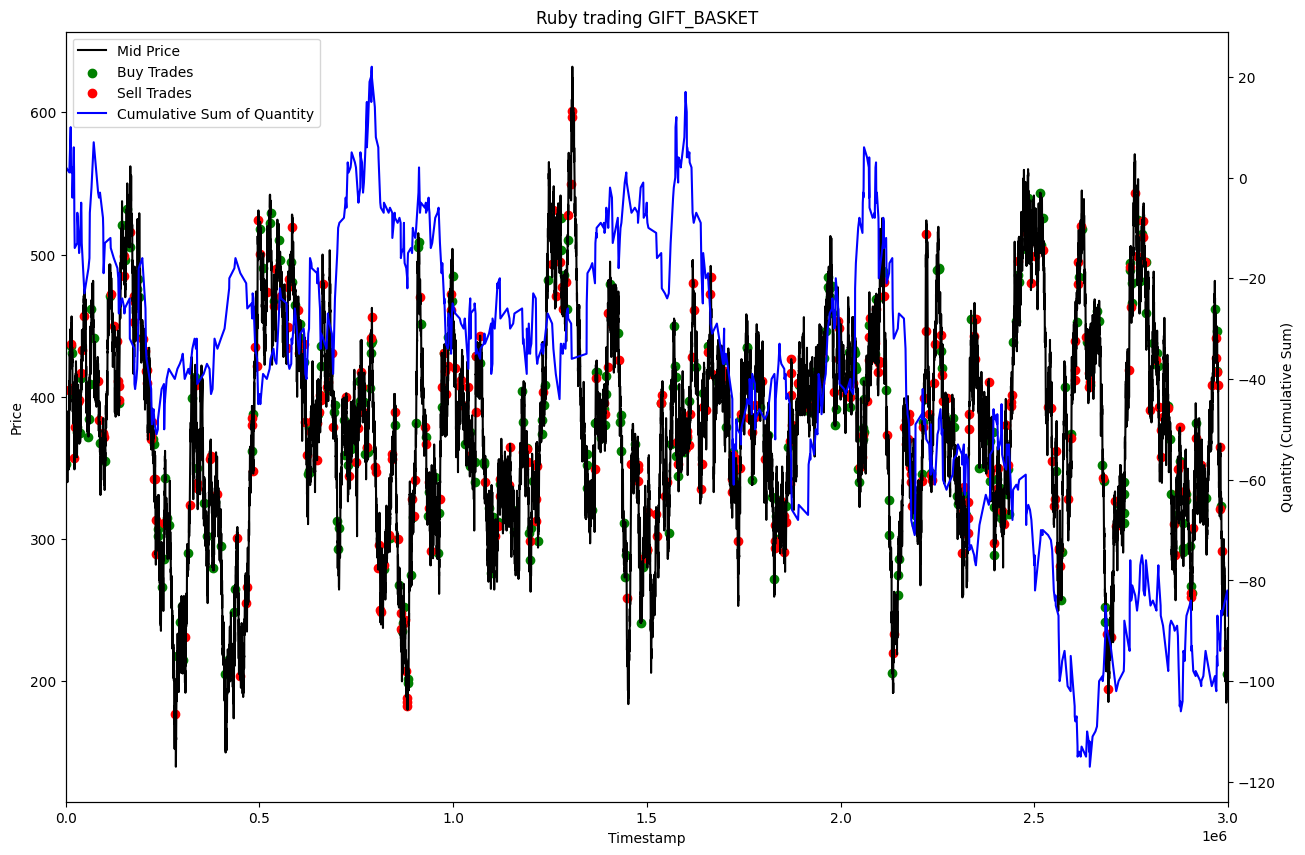

In [ ]:
for product in products:
  for trader in traders:
    plotter(product, trader, trades_df, prices_df, 'both', 0, 3000000)